<a href="https://colab.research.google.com/github/j-reyes314/Project_Examples/blob/main/Fruits_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import accuracy_score

In [ ]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
fruits.keys()

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
data = ['mass','width','height']
print(data)

['mass', 'width', 'height']


In [ ]:
fruits_df = pd.DataFrame(data = fruits[data],columns = data)
fruits_df.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [ ]:
fruits_df['fruit_label'] = fruits['fruit_label']
fruits_df.head()

,mass,width,height,fruit_label
0,192,8.4,7.3,1
1,180,8.0,6.8,1
2,176,7.4,7.2,1
3,86,6.2,4.7,2
4,84,6.0,4.6,2


In [ ]:
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

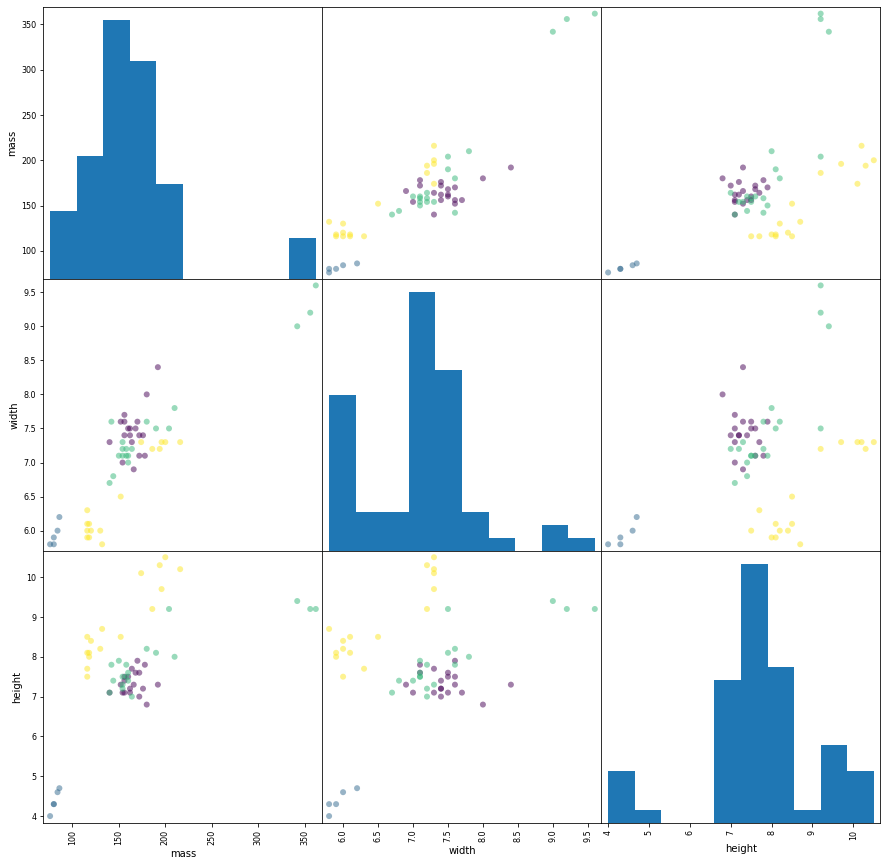

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(fruits_df.iloc[:, :3], figsize=(15, 15), marker='o',
               c=fruits_df['fruit_label'])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
fruits_train, fruits_test = train_test_split(fruits_df, test_size=0.20)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="newton-cg")
model.fit(fruits_df[data], fruits_df['fruit_label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(fruits_df[data])

In [ ]:
fruits_df['prediction'] = predictions

In [ ]:
fruits_df.head()

,mass,width,height,fruit_label,prediction
0,192,8.4,7.3,1,1
1,180,8.0,6.8,1,1
2,176,7.4,7.2,1,1
3,86,6.2,4.7,2,2
4,84,6.0,4.6,2,2


In [ ]:
accuracy = accuracy_score(fruits_df['fruit_label'], fruits_df['prediction'])
print(accuracy)

0.7796610169491526
